# Time-series EDA
Exploratory Data Analysis (EDA)  
Feb 16th 2021

In [17]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from IPython.display import display
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import warnings
warnings.filterwarnings('ignore')
# Config:
pd.options.display.float_format = '{:,.2f}'.format
plotsize = (20, 8)
sns.set_context("paper", font_scale= 1.3)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plt.rcParams['figure.figsize']= plotsize

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_1/1_introduction_forecasting_ts_a


## Input Data

In [2]:
df= pd.read_excel('../course_data/sample-superstore.xls')
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


## Pre-processing
Set-up data monthly

In [9]:
# Select data
new_vars= ['Segment', 'Profit', 'Order Date', 'Sales']
new_base= df[new_vars].set_index('Order Date')
display(new_base.head())
# Remove duplicated rows
prof_pivot= new_base.pivot_table(columns= "Segment", index= "Order Date")
display(prof_pivot.head())
# Set-up data monthly: sum as an aggregation function
prof_month= prof_pivot.resample('M').sum()
prof_month.head(12)

,Segment,Profit,Sales
Order Date,,,
2013-11-09,Consumer,41.91,261.96
2013-11-09,Consumer,219.58,731.94
2013-06-13,Corporate,6.87,14.62
2012-10-11,Consumer,-383.03,957.58
2012-10-11,Consumer,2.52,22.37


Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-04     5.55       NaN         NaN    16.45       NaN         NaN
2011-01-05      NaN       NaN      -22.00      NaN       NaN       96.02
2011-01-06     4.88       NaN         NaN    19.54       NaN         NaN
2011-01-07     9.33      5.24      191.93    19.44     12.78      624.98
2011-01-08   -35.98       NaN         NaN    43.58       NaN         NaN

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-31   106.51      5.95      185.01 1,304.14    567.99      855.95
2011-02-28   228.28    126.05       37.85 1,442.71    464.12      104.12
2011-03-31   -26.53    131.27       73.75 3,777.77  1,988.43    4,439.86
2011-04-30   336.91    435.61      527.88 3,752.78  3,951.19    2,031.59
2011-05-31   484.03    872.96      -63.33 5,373.21  4,077.72      696.09
2011-06-30   514.80    190.53      311.05 5,027.03  1,754.90    1,041.60
2011-07-31   247.46    556.78       71.76 5,285.90  4,168.17    1,649.28
2011-08-31   194.76    752.84      265.50 4,280.38  2,390.16    1,271.26
2011-09-30   927.65   -146.82      292.81 9,115.45  4,218.01    2,252.51
2011-10-31   703.46    230.63      147.92 5,825.23  2,864.76    1,214.67
2011-11-30   656.73    761.50      931.75 7,602.06  3,786.30    3,564.29
2011-12-31   767.54    489.17      529.98 6,407.67  6,118.99    2,977.98

In [12]:
prof_month.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', freq='M')

## Visualizations

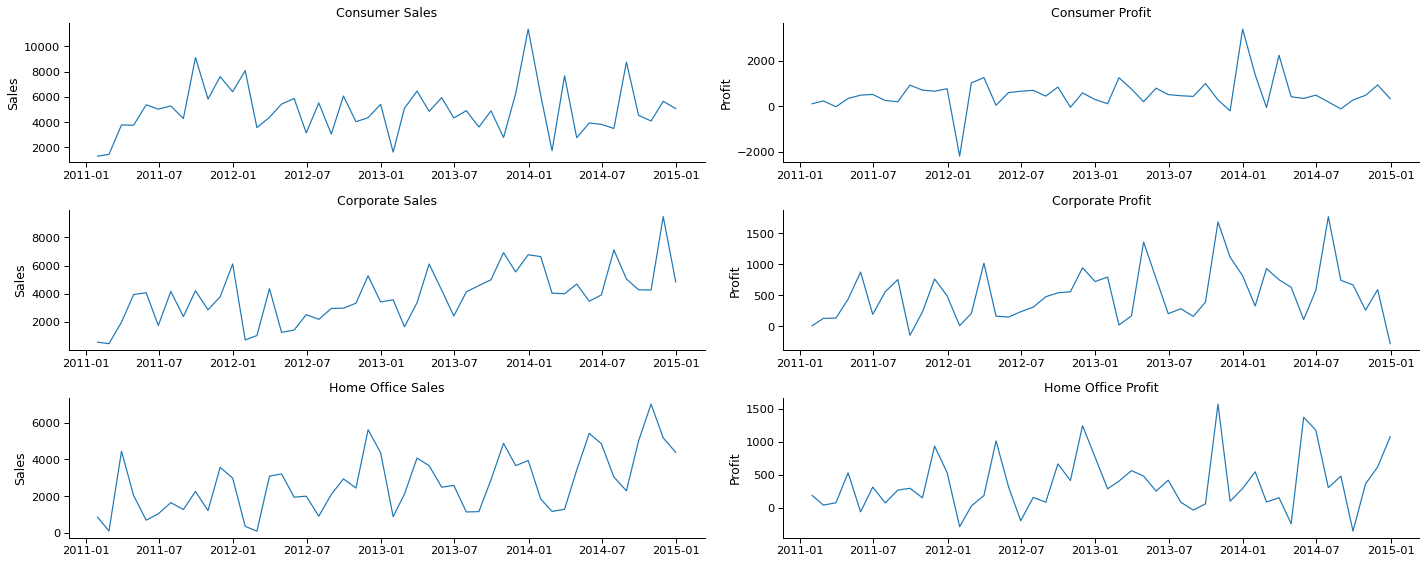

In [16]:
fig, axes= plt.subplots(3,2)

for i, cat in enumerate(['Consumer', 'Corporate', 'Home Office']):
    for j, money in enumerate(['Sales', 'Profit']):
        axes[i,j].plot(prof_month[money, cat])
        axes[i,j].title.set_text(cat+" "+money)
        axes[i,j].set_ylabel(money)
    
fig.tight_layout()
plt.show()

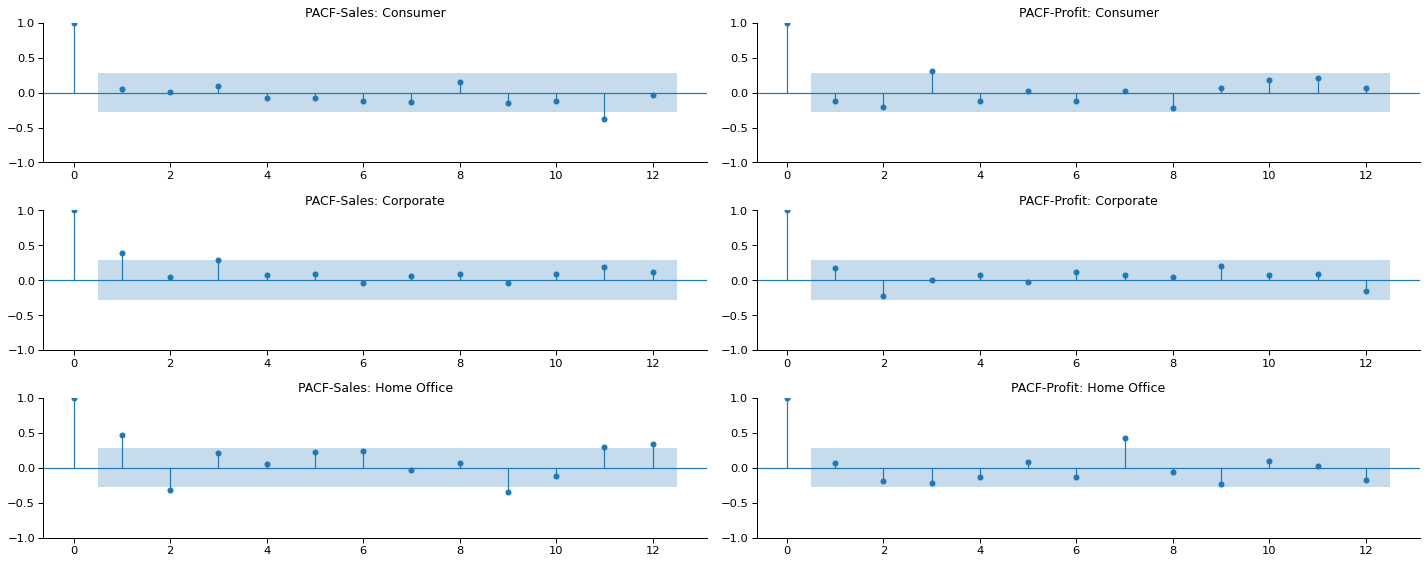

In [18]:
fig, axes= plt.subplots(3,2)

for i, cat in enumerate(['Consumer', 'Corporate', 'Home Office']):
    for j, money in enumerate(['Sales', 'Profit']):
        plot_pacf(prof_month[money, cat], ax= axes[i,j], title= "PACF-"+money+": "+cat, lags= 12)
    
fig.tight_layout()
plt.show()

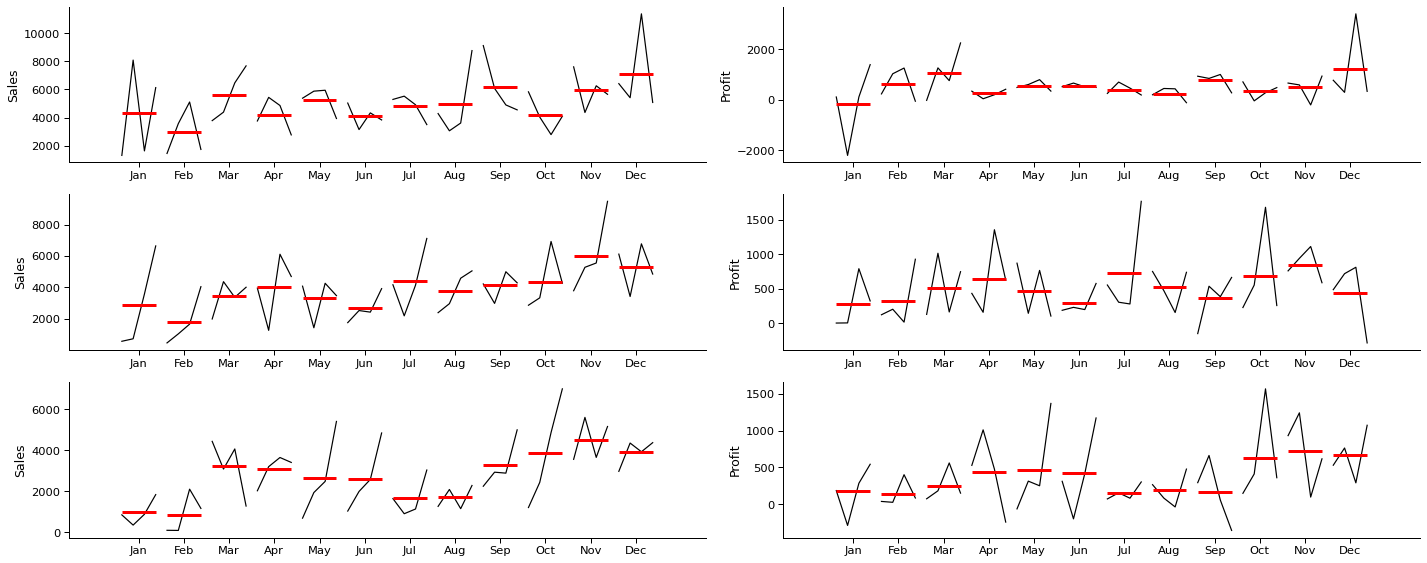

In [19]:
fig, axes= plt.subplots(3,2)

for i, cat in enumerate(['Consumer', 'Corporate', 'Home Office']):
    for j, money in enumerate(['Sales', 'Profit']):
        month_plot(prof_month[money, cat], ax= axes[i,j], ylabel= money)
    
fig.tight_layout()
plt.show()

Develop a function for EDA

In [22]:
cat_var = 'Region'
date_var = 'Order Date'
money_vars = ['Profit', 'Sales']

def monthly_eda(cat_var=cat_var,
                date_var=date_var, 
                money_vars=money_vars):
    new_vars = [cat_var, date_var] + money_vars
    cats = list(df[cat_var].unique())
    num_cats = len(cats)
    new_base = df[new_vars].set_index(date_var)
    prof_pivot = new_base.pivot_table(columns=cat_var,index = date_var)
    prof_month = prof_pivot.resample('M').sum()
    prof_month.head()

    fig,axes = plt.subplots(num_cats*3, 2, figsize=(20, 5*num_cats),)
    for i,cat in enumerate(cats):
        for j,money in enumerate(money_vars):
            axes[i,j].plot(prof_month[money,cat])
            axes[i,j].title.set_text(cat+" "+money)
            fig = plot_pacf(prof_month[money,cat],ax=axes[i+num_cats,j],title = cat+" "+money+" PACF")
            fig = month_plot(prof_month[money,cat],ax=axes[i+num_cats*2,j])
            axes[i+num_cats*2,j].title.set_text(cat+" Seasonality")

    fig.tight_layout()
    plt.show()

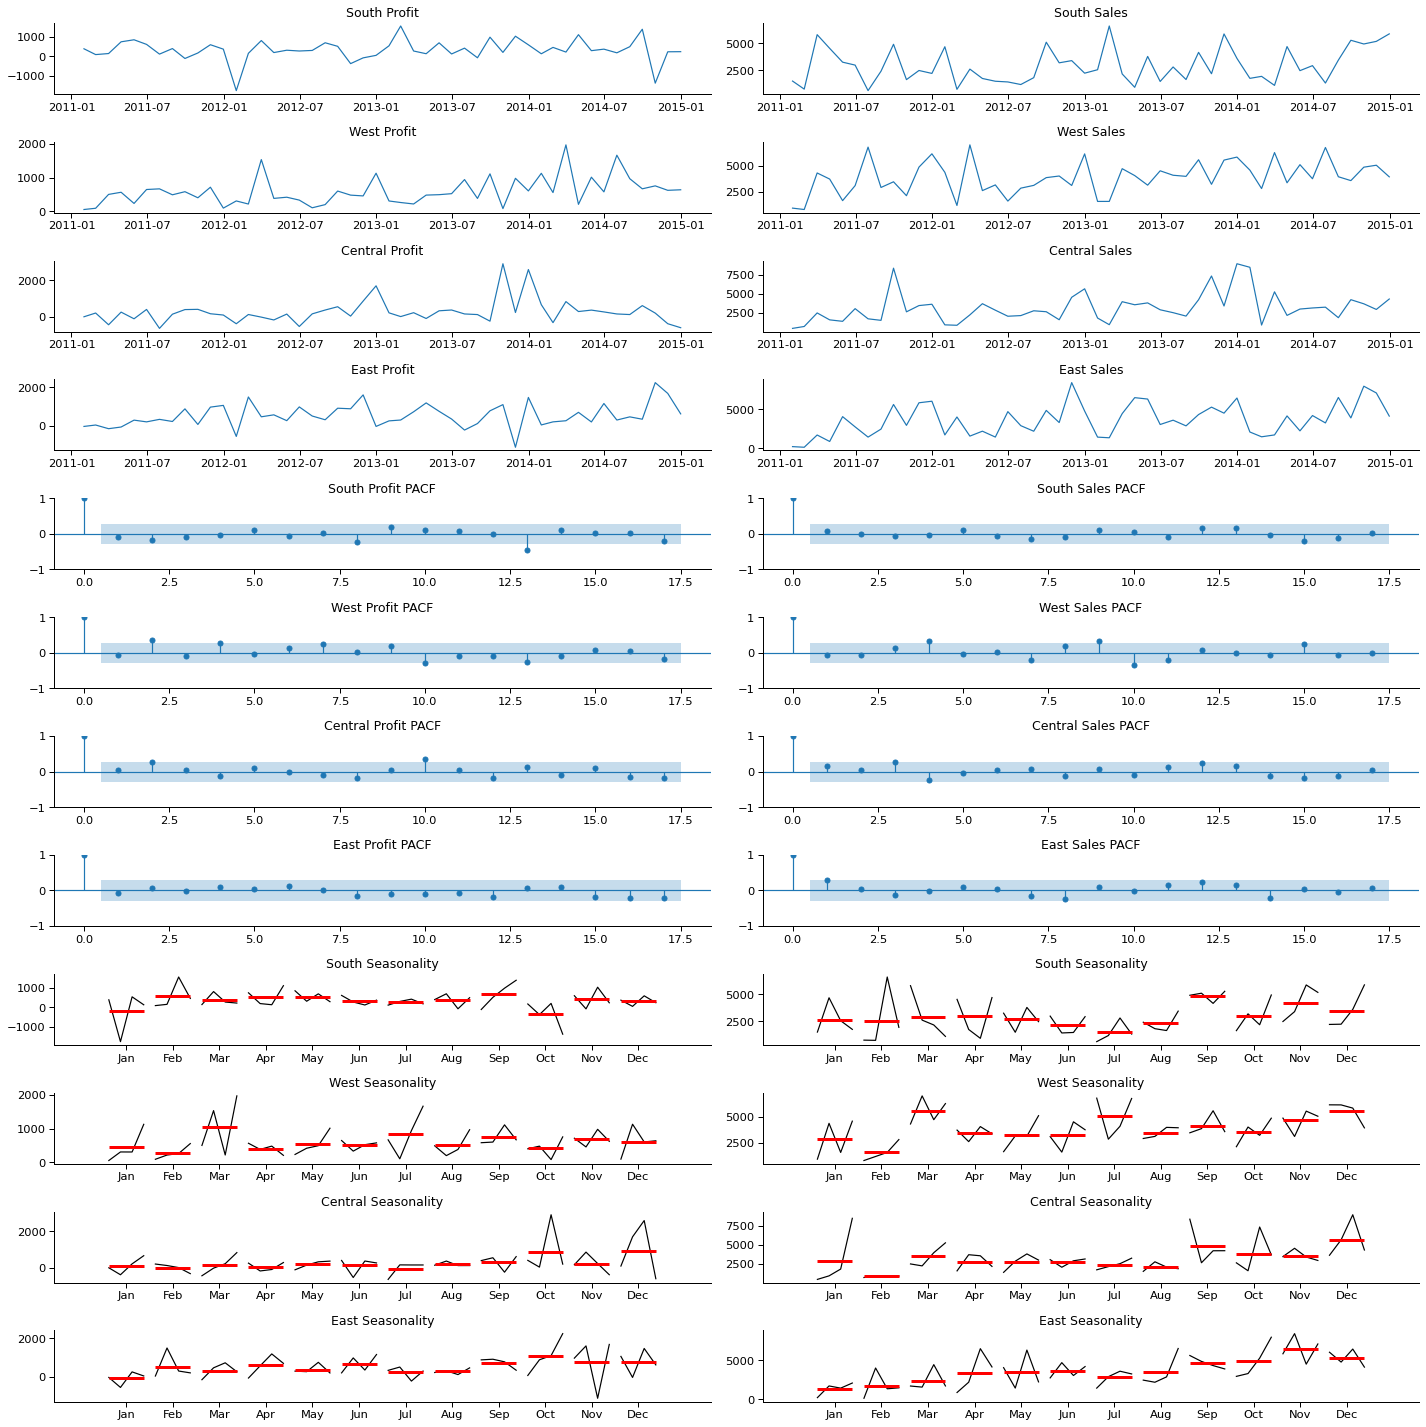

In [23]:
monthly_eda(cat_var='Region')